<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../../Index.ipynb"><< Index</a>
<br>
<a href="./02_DINEOF_run_Py.ipynb" target="_blank"><< Run DINEOF</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2023 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT), Aida Alvera-Azcárate (GHER).

<div class="alert alert-block alert-success">
<h3>Liege Colloquium 2023</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

The following modules are prerequisites for this notebook:
  - **<a href="./01_DINEOF_prepare_Py.ipynb">DINEOF preparation</a>**
  - **<a href="./01_DINEOF_Run_Py.ipynb">Run DINEOF</a>**
</div>
<hr>

# 3. DINEOF results

In this script we are going to visualise the results of the DINEOF reconstruction

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>

1. [Read input and output files](#section1)
1. [Compare input and output fields](#section2)

In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Read input and output files
[Back to top](#TOC_TOP)

</div>

In [18]:
# Read the initial (cloudy) data, land-sea mask, time, latitude and longitude
filename = "sst_L3_Alboran_2022_py.nc"
ds = Dataset(filename, "r");
sst = ds.variables['SST'][:]
lat = ds.variables['lat'][:]
lon = ds.variables['lon'][:]
time = ds.variables['time'][:]
mask = ds.variables['mask'][:].astype(float)
mask[mask > 0]=np.nan
ds.close()

In [3]:
# Read the filled data
filename = "sst_L4_dineof_Alboran_2022_py.nc"
ds2 = Dataset(filename, "r");
sstf = ds2.variables['sst_filled'][:]
ds.close()

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Compare input and output fields
[Back to top](#TOC_TOP)

</div>

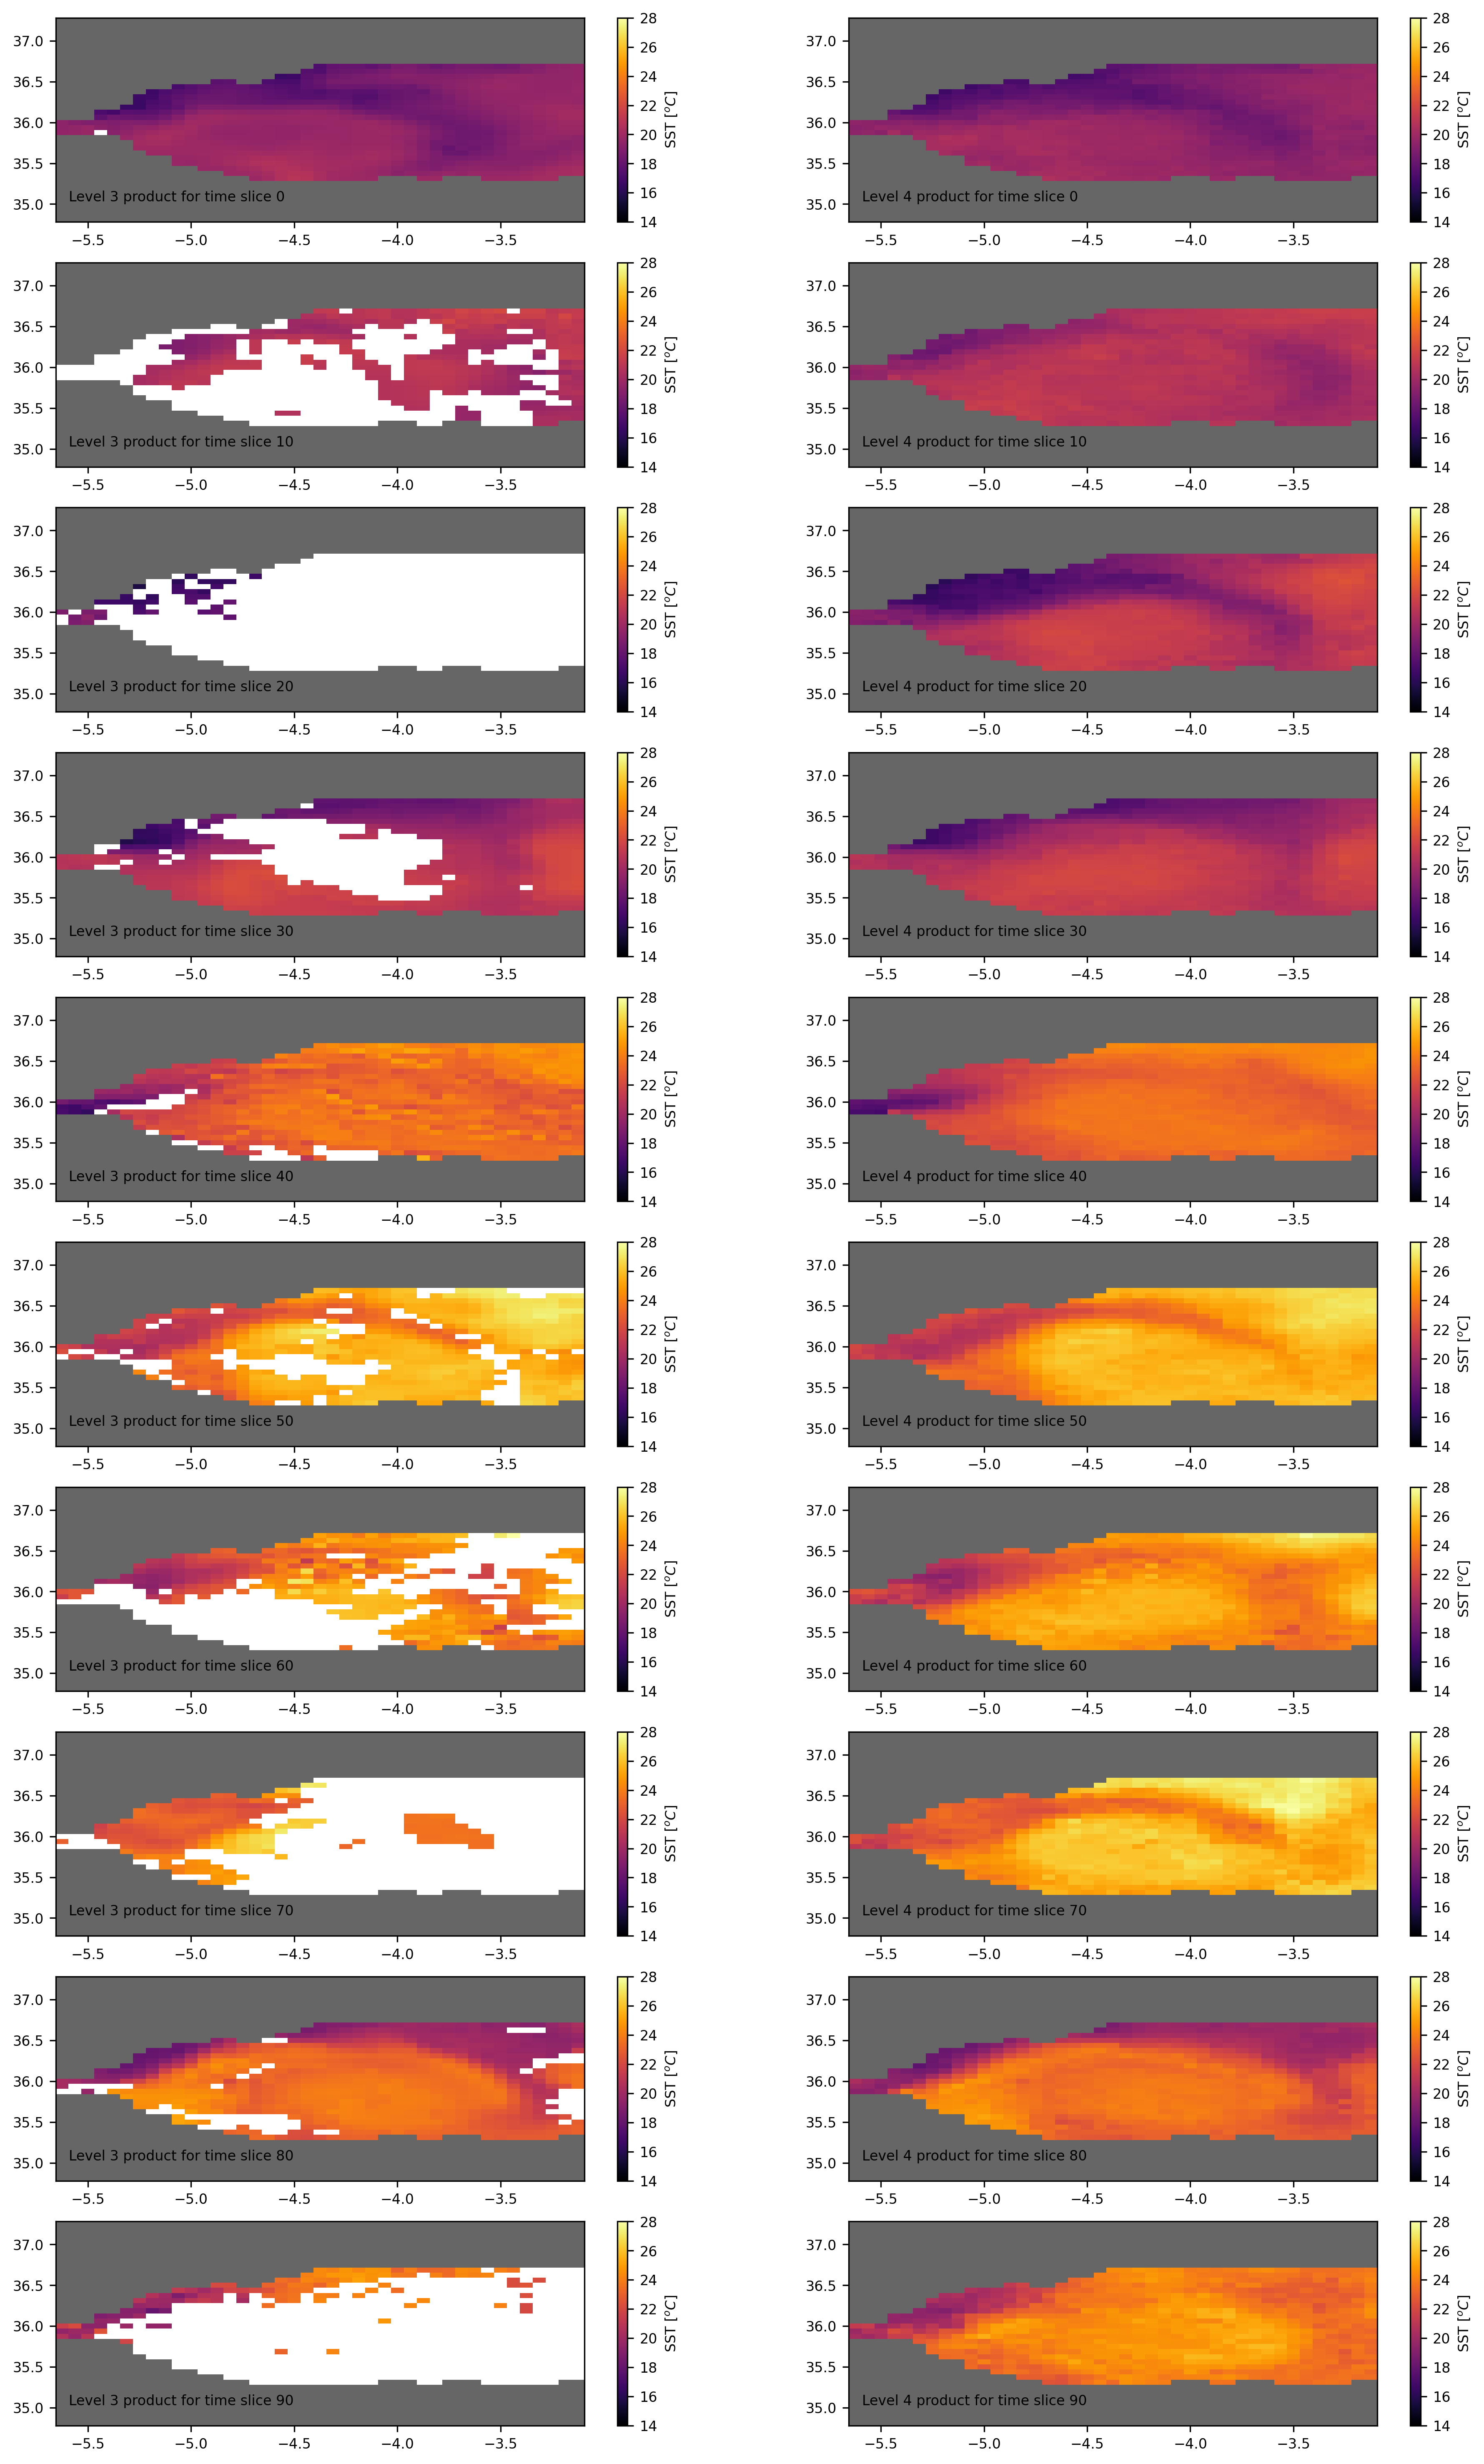

In [24]:
#Choose the time instances to plot
stride = 10
frames = np.arange(0, np.shape(sst)[0], stride)

plt.rcParams.update({'font.size': 8})
fig, axs = plt.subplots(len(frames), 2, figsize=(15, 25), dpi=300)

min_val = np.nanmin([np.floor(np.nanmin(sst)), np.floor(np.nanmin(sstf))])
max_val = np.nanmin([np.floor(np.nanmax(sst)), np.floor(np.nanmax(sstf))])

count = -1
for ii in frames:
    count = count + 1
    for col, source, level in zip([0,1], [sst, sstf], ["3", "4"]):
        axs[count, col].pcolormesh(lon, lat, mask, cmap="Accent_r", zorder = 1)
        im = axs[count, col].pcolormesh(lon, lat, source[ii,:,:], vmin=min_val, vmax=max_val, cmap="inferno")
        axs[count, col].annotate(f"Level {level} product for time slice {ii}", (0.025, 0.1), xycoords="axes fraction")
        plt.colorbar(im, label="SST [$^{o}C$]")

<hr>
<a href="../../Index.ipynb"><< Index</a>
<br>
<a href="./02_DINEOF_run_Py.ipynb" target="_blank"><< Run DINEOF</a>
<hr>
<a href="https://github.com/wekeo/liege-colloquium-23" target="_blank">View on GitHub</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>